## Monte Carlo Model

## Using overal average and standard deviation

In [1]:
import random
random.seed(0)  # Set a fixed seed for reproducibility

Monte Carlo MSE Error: 15.249685877262175
Monte Carlo RMSE Error: 3.9050846184509465
Price Mean: 163.11567078189302
Prediction Price Mean: 294.2174164545644


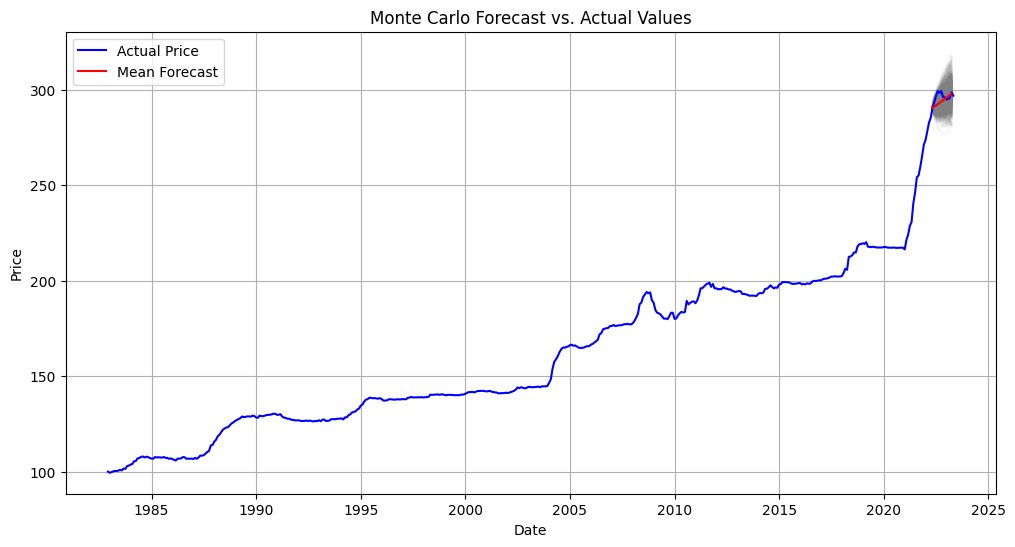

In [2]:
Path = 'Sheet_metal_mng.csv'



import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv(Path,index_col='Date',parse_dates=True)
df.index.freq = 'MS'
train = df.iloc[:-12]  # All except the last 12 rows
test = df.iloc[-12:]   # Last 12 rows for testing

# Monte Carlo Function
def monte_carlo_forecast(price_series, expected_return, volatility, num_simulations, num_periods):
    simulations = np.zeros((num_simulations, num_periods))
    simulations[:, 0] = price_series.iloc[-1]  # Start simulations from the last available price

    for i in range(num_simulations):
        for j in range(1, num_periods):
            random_num = random.gauss(0, 1)
            drift = expected_return * simulations[i, j - 1]
            shock = volatility * random_num * simulations[i, j - 1]
            simulations[i, j] = simulations[i, j - 1] + drift + shock

    forecast_dates = pd.date_range(start=price_series.index[-1], periods=num_periods, freq=price_series.index.freq)
    forecast_df = pd.DataFrame(simulations, index=range(num_simulations), columns=forecast_dates)
    
    return forecast_df

# Calculate historical returns, expected return
historical_returns = train['Price'].pct_change().dropna() #computing the percentage change in prices over each period

# Calculate average historical return
historical_avg_return = historical_returns.mean() #Calculate the average of the historical returns to determine the historical average return.

# Calculate historical volatility
historical_volatility = historical_returns.std()

# Call function
expected_return = historical_avg_return
volatility = historical_volatility
num_simulations = 1000
num_periods = 12
forecast = monte_carlo_forecast(train['Price'], expected_return, volatility, num_simulations, num_periods)

# Calculate ARIMA MSE and RMSE
MonteCarlo_mse = mean_squared_error(test['Price'], forecast.mean().values)
MonteCarlo_rmse = np.sqrt(MonteCarlo_mse)
print('Monte Carlo MSE Error:', MonteCarlo_mse)
print('Monte Carlo RMSE Error:',MonteCarlo_rmse)
print('Price Mean:',df.Price.mean())
print('Prediction Price Mean:',forecast.mean().mean())
# Plotting the forecast and actual values
plt.figure(figsize=(12, 6))
plt.plot(forecast.T, color='gray', alpha=0.05)  # Plotting all simulations
plt.plot(df.index, df['Price'], color='blue', label='Actual Price')  # Plotting actual values
plt.plot(forecast.columns, forecast.mean(), color='red', label='Mean Forecast')  # Plotting mean forecast
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Monte Carlo Forecast vs. Actual Values')
plt.legend()
plt.grid()
plt.show()

In [3]:
expected_return

0.0022791458101823403

In [4]:
volatility

0.006583034288965973

In [5]:
train['Price']

Date
1982-12-01    100.000
1983-01-01     99.400
1983-02-01     99.700
1983-03-01    100.100
1983-04-01    100.300
               ...   
2022-01-01    273.783
2022-02-01    278.514
2022-03-01    282.844
2022-04-01    285.359
2022-05-01    290.581
Freq: MS, Name: Price, Length: 474, dtype: float64

In [6]:
historical_monthly_returns = train['Price'].pct_change().dropna()
historical_monthly_volatility = historical_monthly_returns.groupby(by=[historical_returns.index.month]).std()
historical_avg_return_monthly = historical_monthly_returns.groupby(by=[historical_returns.index.month]).mean()

In [7]:
historical_returns

Date
1983-01-01   -0.006000
1983-02-01    0.003018
1983-03-01    0.004012
1983-04-01    0.001998
1983-05-01    0.000000
                ...   
2022-01-01    0.009383
2022-02-01    0.017280
2022-03-01    0.015547
2022-04-01    0.008892
2022-05-01    0.018300
Freq: MS, Name: Price, Length: 473, dtype: float64

In [8]:
historical_monthly_volatility

Date
1     0.005965
2     0.006655
3     0.007743
4     0.007255
5     0.007903
6     0.007933
7     0.005198
8     0.007703
9     0.003769
10    0.004775
11    0.006162
12    0.005617
Name: Price, dtype: float64

In [9]:
historical_avg_return_monthly

Date
1     0.000913
2     0.002171
3     0.004209
4     0.002876
5     0.004217
6     0.002420
7     0.002518
8     0.003290
9     0.000497
10    0.001032
11    0.002885
12    0.000244
Name: Price, dtype: float64

In [10]:
num_simulations = 1
num_periods = 12
expected_return = historical_avg_return_monthly[1]
volatility = historical_monthly_volatility[1]
forecast = monte_carlo_forecast(train['Price'], expected_return, volatility, num_simulations, num_periods).T
forecast[forecast.index.month==1]

,0
2023-01-01,286.002045


## Using period avg and period std

Monte Carlo MSE Error: 24.9998477647334
Monte Carlo RMSE Error: 4.999984776450164
Price Mean: 163.11567078189302
Prediction Price Mean: 294.14484511805864


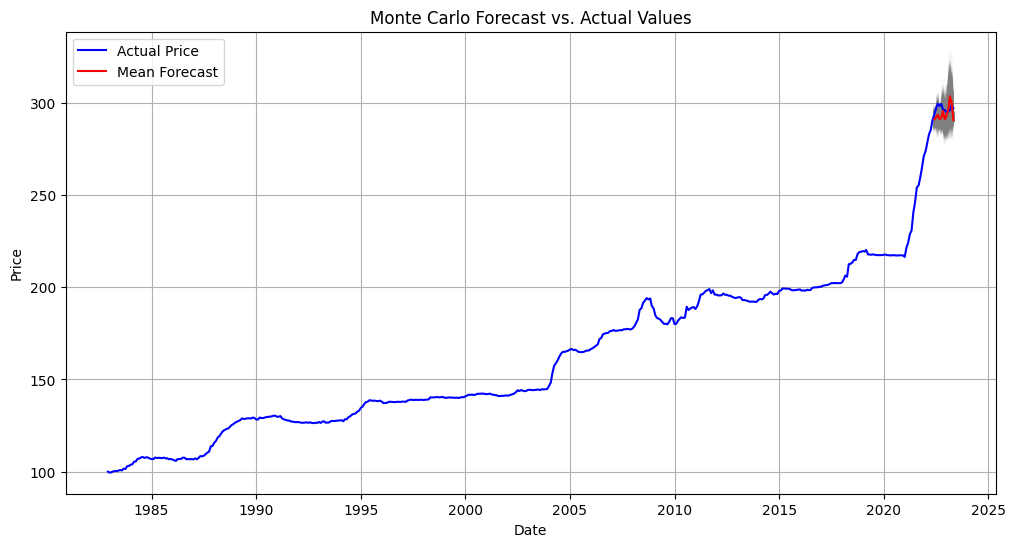

In [11]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv(Path,index_col='Date',parse_dates=True)
df.index.freq = 'MS'
train = df.iloc[:-12]  # All except the last 12 rows
test = df.iloc[-12:]   # Last 12 rows for testing

# Monte Carlo Function
def monte_carlo_forecast(price_series, expected_return, volatility, num_simulations, num_periods):
    simulations = np.zeros((num_simulations, num_periods))
    simulations[:, 0] = price_series.iloc[-1]  # Start simulations from the last available price

    for i in range(num_simulations):
        for j in range(1, num_periods):
            random_num = random.gauss(0, 1)
            drift = expected_return * simulations[i, j - 1]
            shock = volatility * random_num * simulations[i, j - 1]
            simulations[i, j] = simulations[i, j - 1] + drift + shock

    forecast_dates = pd.date_range(start=price_series.index[-1], periods=num_periods, freq=price_series.index.freq)
    forecast_df = pd.DataFrame(simulations, index=range(num_simulations), columns=forecast_dates)
    
    return forecast_df

historical_returns = train['Price'].pct_change().dropna()
historical_monthly_volatility = historical_returns.groupby(by=[historical_returns.index.month]).std()
historical_avg_return_monthly = historical_returns.groupby(by=[historical_returns.index.month]).mean()

num_simulations = 1000
num_periods = 12
all_forecasts = pd.DataFrame()
for month in range(1,13):
    expected_return = historical_avg_return_monthly[month]
    volatility = historical_monthly_volatility[month]
    forecast = monte_carlo_forecast(train['Price'], expected_return, volatility, num_simulations, num_periods).T
    forecast_month =forecast[forecast.index.month==month].T
#     print(forecast_month)
    all_forecasts[month] = forecast_month
# Rename the columns with the corresponding month names (optional)
month_names = ['2023-01-01', '2023-02-01', '2023-03-01', '2023-04-01','2023-05-01','2022-06-01','2022-07-01','2022-08-01','2022-09-01','2022-10-01','2022-11-01','2022-12-01']  # Replace with actual month names
all_forecasts.columns = pd.to_datetime(month_names)
# Sort columns based on datetime values
all_forecasts = all_forecasts.sort_index(axis=1)

# Calculate Monte Carlo MSE and RMSE
MonteCarlo_mse = mean_squared_error(test['Price'], all_forecasts.mean().values)
MonteCarlo_rmse = np.sqrt(MonteCarlo_mse)
print('Monte Carlo MSE Error:', MonteCarlo_mse)
print('Monte Carlo RMSE Error:',MonteCarlo_rmse)
print('Price Mean:',df.Price.mean())
print('Prediction Price Mean:',all_forecasts.mean().mean())
# Plotting the forecast and actual values
plt.figure(figsize=(12, 6))
plt.plot(all_forecasts.T, color='gray', alpha=0.05)  # Plotting all simulations
plt.plot(df.index, df['Price'], color='blue', label='Actual Price')  # Plotting actual values
plt.plot(all_forecasts.columns, all_forecasts.mean(), color='red', label='Mean Forecast')  # Plotting mean forecast
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Monte Carlo Forecast vs. Actual Values')
plt.legend()
plt.grid()
plt.show()

In [12]:
all_forecasts.mean()

2022-06-01    291.120759
2022-07-01    292.064668
2022-08-01    293.532575
2022-09-01    291.134997
2022-10-01    291.986093
2022-11-01    295.617505
2022-12-01    290.995311
2023-01-01    292.896855
2023-02-01    296.252730
2023-03-01    303.543266
2023-04-01    300.012381
2023-05-01    290.581000
dtype: float64

In [13]:
# [train.index[-1] + pd.DateOffset(months=i) for i in range(1, 13)]

In [14]:
all_forecasts.mean()

2022-06-01    291.120759
2022-07-01    292.064668
2022-08-01    293.532575
2022-09-01    291.134997
2022-10-01    291.986093
2022-11-01    295.617505
2022-12-01    290.995311
2023-01-01    292.896855
2023-02-01    296.252730
2023-03-01    303.543266
2023-04-01    300.012381
2023-05-01    290.581000
dtype: float64

#### going back years *12 + 1 month to have full year data

In [15]:
years = 3
train = df.iloc[-(years * 12 + 1):-12]
train

,Price
Date,
2020-05-01,217.300
2020-06-01,217.300
2020-07-01,217.400
2020-08-01,217.200
2020-09-01,217.200
2020-10-01,217.300
2020-11-01,217.300
2020-12-01,217.300
2021-01-01,216.400


In [16]:
historical_returns = train['Price'].pct_change().dropna()
historical_returns

Date
2020-06-01    0.000000
2020-07-01    0.000460
2020-08-01   -0.000920
2020-09-01    0.000000
2020-10-01    0.000460
2020-11-01    0.000000
2020-12-01    0.000000
2021-01-01   -0.004142
2021-02-01    0.023567
2021-03-01    0.011287
2021-04-01    0.020982
2021-05-01    0.009182
2021-06-01    0.042461
2021-07-01    0.023076
2021-08-01    0.032447
2021-09-01    0.004226
2021-10-01    0.017797
2021-11-01    0.021278
2021-12-01    0.022452
2022-01-01    0.009383
2022-02-01    0.017280
2022-03-01    0.015547
2022-04-01    0.008892
2022-05-01    0.018300
Freq: MS, Name: Price, dtype: float64

In [17]:
historical_monthly_volatility = historical_returns.groupby(by=[historical_returns.index.month]).std()
historical_monthly_volatility

Date
1     0.009563
2     0.004446
3     0.003012
4     0.008549
5     0.006447
6     0.030024
7     0.015992
8     0.023594
9     0.002988
10    0.012259
11    0.015046
12    0.015876
Name: Price, dtype: float64

### Check model for years=10 

Date
2013-06-01   -0.001554
2013-07-01   -0.001037
2013-08-01   -0.002596
2013-09-01    0.000521
2013-10-01    0.000000
                ...   
2022-01-01    0.009383
2022-02-01    0.017280
2022-03-01    0.015547
2022-04-01    0.008892
2022-05-01    0.018300
Freq: MS, Name: Price, Length: 108, dtype: float64
Date
1     0.004383
2     0.009066
3     0.006005
4     0.008800
5     0.011322
6     0.014175
7     0.007463
8     0.011028
9     0.002325
10    0.007539
11    0.006980
12    0.007474
Name: Price, dtype: float64
Date
1     0.002707
2     0.005768
3     0.005095
4     0.001907
5     0.008100
6     0.004764
7     0.003641
8     0.004744
9     0.000029
10    0.003290
11    0.003262
12    0.002597
Name: Price, dtype: float64
     2022-06-01  2022-07-01  2022-08-01  2022-09-01  2022-10-01  2022-11-01  \
0    290.836618  293.193525  293.634685  290.707239  300.121952  304.799439   
1    289.010396  295.933078  302.010452  288.992316  297.177039  290.886975   
2    296.127392  290.225784 

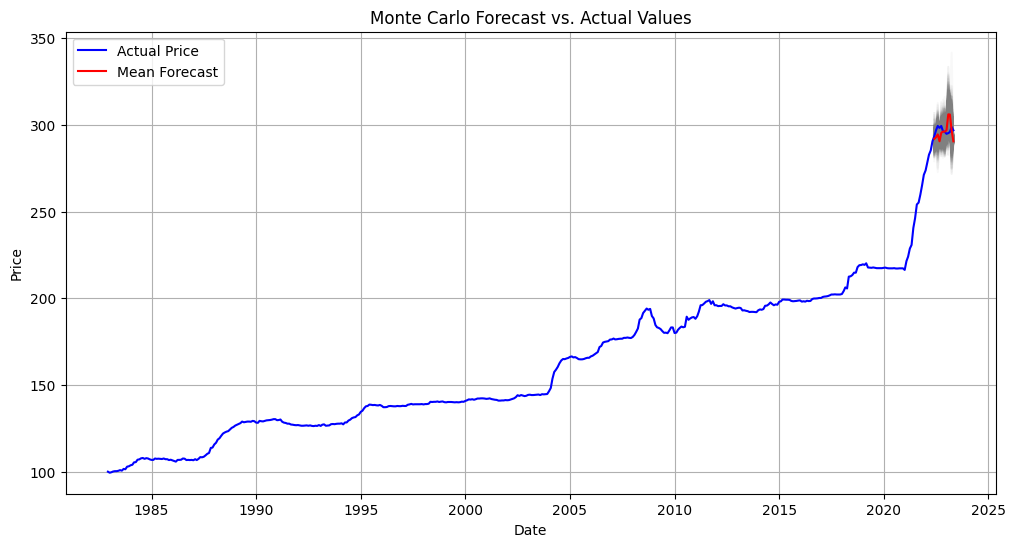

In [18]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv(Path,index_col='Date',parse_dates=True)
df.index.freq = 'MS'
years =10
train = df.iloc[-(years * 12 +1):-12]  # Use the last "years" years of data for training
test = df.iloc[-12:]  # Last 12 months for testing

# Monte Carlo Function
def monte_carlo_forecast(price_series, expected_return, volatility, num_simulations, num_periods):
    simulations = np.zeros((num_simulations, num_periods))
    simulations[:, 0] = price_series.iloc[-1]  # Start simulations from the last available price

    for i in range(num_simulations):
        for j in range(1, num_periods):
            random_num = random.gauss(0, 1)
            drift = expected_return * simulations[i, j - 1]
            shock = volatility * random_num * simulations[i, j - 1]
            simulations[i, j] = simulations[i, j - 1] + drift + shock

    forecast_dates = pd.date_range(start=price_series.index[-1], periods=num_periods, freq=price_series.index.freq)
    forecast_df = pd.DataFrame(simulations, index=range(num_simulations), columns=forecast_dates)
    
    return forecast_df

historical_returns = train['Price'].pct_change().dropna()
historical_monthly_volatility = historical_returns.groupby(by=[historical_returns.index.month]).std()
historical_avg_return_monthly = historical_returns.groupby(by=[historical_returns.index.month]).mean()
print(historical_returns)
print(historical_monthly_volatility)
print(historical_avg_return_monthly)
num_simulations = 1000
num_periods = 12
all_forecasts = pd.DataFrame()
for month in range(1,13):
    expected_return = historical_avg_return_monthly[month]
    volatility = historical_monthly_volatility[month]
    forecast = monte_carlo_forecast(train['Price'], expected_return, volatility, num_simulations, num_periods).T
    forecast_month =forecast[forecast.index.month==month].T
#     print(forecast_month)
    all_forecasts[month] = forecast_month


# Rename the columns with the corresponding month names (optional)
month_names = ['2023-01-01', '2023-02-01', '2023-03-01', '2023-04-01','2023-05-01','2022-06-01','2022-07-01','2022-08-01','2022-09-01','2022-10-01','2022-11-01','2022-12-01']  # Replace with actual month names
all_forecasts.columns = pd.to_datetime(month_names)
# Sort columns based on datetime values
all_forecasts = all_forecasts.sort_index(axis=1)
print(all_forecasts)
# Calculate Monte Carlo MSE and RMSE
MonteCarlo_mse = mean_squared_error(test['Price'], all_forecasts.mean().values)
MonteCarlo_rmse = np.sqrt(MonteCarlo_mse)
print('Monte Carlo MSE Error:', MonteCarlo_mse)
print('Monte Carlo RMSE Error:',MonteCarlo_rmse)
print('Price Mean:',df.Price.mean())
print('Prediction Price Mean:',all_forecasts.mean().mean())
# Plotting the forecast and actual values
plt.figure(figsize=(12, 6))
plt.plot(all_forecasts.T, color='gray', alpha=0.05)  # Plotting all simulations
plt.plot(df.index, df['Price'], color='blue', label='Actual Price')  # Plotting actual values
plt.plot(all_forecasts.columns, all_forecasts.mean(), color='red', label='Mean Forecast')  # Plotting mean forecast
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Monte Carlo Forecast vs. Actual Values')
plt.legend()
plt.grid()
plt.show()

In [19]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

# Define the maximum historical data period to consider (in years)
years = 3
max_history_years = df.shape[0]//12

# Initialize variables to track the minimum RMSE and its corresponding year
min_rmse = float('inf')
best_year = None

# Initialize lists to store results
mse_values = []
rmse_values = []
years_list = []

def monte_carlo_simulation(df, years_back):
    # Select historical data for the specified number of years
    train = df.iloc[-(years_back * 12 +1 ):-12]  # Use the last "years_back" years of data for training
    test = df.iloc[-12:]  # Last 12 months for testing

    # Monte Carlo Function
    def monte_carlo_forecast(price_series, expected_return, volatility, num_simulations, num_periods):
        simulations = np.zeros((num_simulations, num_periods))
        simulations[:, 0] = price_series.iloc[-1]  # Start simulations from the last available price

        for i in range(num_simulations):
            for j in range(1, num_periods):
                random_num = random.gauss(0, 1)
                drift = expected_return * simulations[i, j - 1]
                shock = volatility * random_num * simulations[i, j - 1]
                simulations[i, j] = simulations[i, j - 1] + drift + shock

        forecast_dates = pd.date_range(start=price_series.index[-1], periods=num_periods, freq=price_series.index.freq)
        forecast_df = pd.DataFrame(simulations, index=range(num_simulations), columns=forecast_dates)

        return forecast_df

    historical_returns = train['Price'].pct_change().dropna()
    historical_monthly_volatility = historical_returns.groupby(by=[historical_returns.index.month]).std()
    historical_avg_return_monthly = historical_returns.groupby(by=[historical_returns.index.month]).mean()

    num_simulations = 1000
    num_periods = 12
    all_forecasts = pd.DataFrame()
    for month in range(1, 13):
        expected_return = historical_avg_return_monthly[month]  # Use `month` directly as the index
        volatility = historical_monthly_volatility[month]  # Use `month` directly as the index
        forecast = monte_carlo_forecast(train['Price'], expected_return, volatility, num_simulations, num_periods).T
        forecast_month = forecast[forecast.index.month == month].T
        all_forecasts[month] = forecast_month

    # Rename the columns with the corresponding month names
    month_names = ['2023-01-01', '2023-02-01', '2023-03-01', '2023-04-01',
                   '2023-05-01', '2023-06-01', '2023-07-01', '2023-08-01',
                   '2023-09-01', '2023-10-01', '2023-11-01', '2023-12-01']
    all_forecasts.columns = pd.to_datetime(month_names)
    all_forecasts = all_forecasts.sort_index(axis=1)

    # Calculate Monte Carlo RMSE
    MonteCarlo_mse = mean_squared_error(test['Price'], all_forecasts.mean().values)
    MonteCarlo_rmse = np.sqrt(MonteCarlo_mse)

    return MonteCarlo_rmse

for years_back in range((years), max_history_years + 1):
    # Select historical data for the specified number of years
    train = df.iloc[-(years_back * 12 +1):-12]  # Use the last "years_back" years of data for training
    test = df.iloc[-12:]  # Last 12 months for testing

    # Calculate historical returns, monthly volatility, and average monthly returns from the training data
    historical_returns = train['Price'].pct_change().dropna()
    historical_monthly_volatility = historical_returns.groupby(by=[historical_returns.index.month]).std()
    historical_avg_return_monthly = historical_returns.groupby(by=[historical_returns.index.month]).mean()

    num_simulations = 1000
    num_periods = 12
    all_forecasts = pd.DataFrame()
    for month in range(1, 13):
        expected_return = historical_avg_return_monthly[month]  # Use `month` directly as the index
        volatility = historical_monthly_volatility[month]  # Use `month` directly as the index
        forecast = monte_carlo_forecast(train['Price'], expected_return, volatility, num_simulations, num_periods).T
        forecast_month = forecast[forecast.index.month == month].T
        all_forecasts[month] = forecast_month

    # Rename the columns with the corresponding month names
    month_names = ['2023-01-01', '2023-02-01', '2023-03-01', '2023-04-01',
                   '2023-05-01', '2023-06-01', '2023-07-01', '2023-08-01',
                   '2023-09-01', '2023-10-01', '2023-11-01', '2023-12-01']
    all_forecasts.columns = pd.to_datetime(month_names)
    all_forecasts = all_forecasts.sort_index(axis=1)

    # Calculate Monte Carlo RMSE
    MonteCarlo_mse = mean_squared_error(test['Price'], all_forecasts.mean().values)
    MonteCarlo_rmse = np.sqrt(MonteCarlo_mse)
    
    # Append results to lists
    mse_values.append(MonteCarlo_mse)
    rmse_values.append(MonteCarlo_rmse)
    years_list.append(years_back)
    # Check if the current RMSE is the smallest found so far
    if MonteCarlo_rmse < min_rmse:
        min_rmse = MonteCarlo_rmse
        best_year = years_back

    # Print results for each year
    print(f'Year {years_back} - Monte Carlo RMSE Error:', MonteCarlo_rmse)

# Print the least RMSE and its corresponding year
print(f"The least RMSE is {min_rmse} which is for year {best_year}.")

Year 3 - Monte Carlo RMSE Error: 22.938610662038414
Year 4 - Monte Carlo RMSE Error: 13.479731943188026
Year 5 - Monte Carlo RMSE Error: 8.478365418343547
Year 6 - Monte Carlo RMSE Error: 8.089226072756206
Year 7 - Monte Carlo RMSE Error: 6.640372138788888
Year 8 - Monte Carlo RMSE Error: 5.382820631570363
Year 9 - Monte Carlo RMSE Error: 5.2231776513013095
Year 10 - Monte Carlo RMSE Error: 4.853041611172972
Year 11 - Monte Carlo RMSE Error: 4.630011038866851
Year 12 - Monte Carlo RMSE Error: 4.464099994372472
Year 13 - Monte Carlo RMSE Error: 4.627694531754212
Year 14 - Monte Carlo RMSE Error: 4.70433725790958
Year 15 - Monte Carlo RMSE Error: 4.496557767229453
Year 16 - Monte Carlo RMSE Error: 4.585501588926315
Year 17 - Monte Carlo RMSE Error: 4.318826355709695
Year 18 - Monte Carlo RMSE Error: 4.312818460278341
Year 19 - Monte Carlo RMSE Error: 4.128557283754498
Year 20 - Monte Carlo RMSE Error: 4.896570135094937
Year 21 - Monte Carlo RMSE Error: 4.660475748328441
Year 22 - Monte C

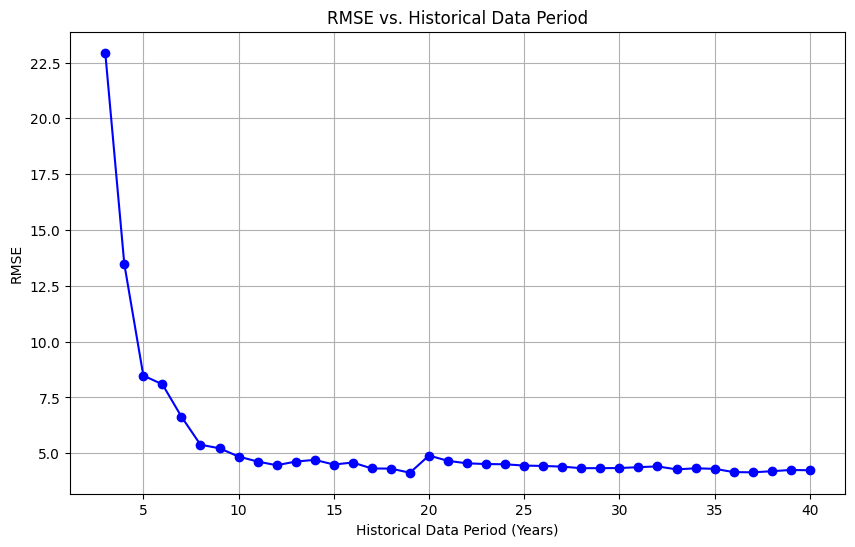

In [20]:
# Plot RMSE based on year
plt.figure(figsize=(10, 6))
plt.plot(years_list, rmse_values, marker='o', linestyle='-', color='b')
plt.title('RMSE vs. Historical Data Period')
plt.xlabel('Historical Data Period (Years)')
plt.ylabel('RMSE')
plt.grid(True)
plt.show()

Monte Carlo RMSE Error: 4.238231893569298


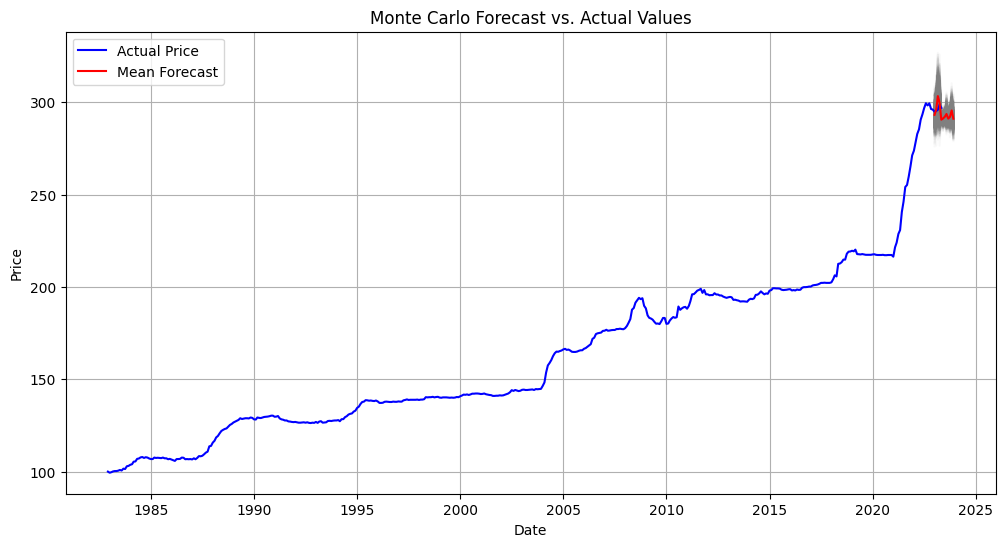

In [21]:
# Path = 'Sheet_metal_mng.csv'
# df = pd.read_csv(Path,index_col='Date',parse_dates=True)
# df.index.freq = 'MS'
years_back = best_year
monte_carlo_simulation(df, years_back)
print('Monte Carlo RMSE Error:',MonteCarlo_rmse)

# Plotting the forecast and actual values
plt.figure(figsize=(12, 6))
plt.plot(all_forecasts.T, color='gray', alpha=0.05)  # Plotting all simulations
plt.plot(df.index, df['Price'], color='blue', label='Actual Price')  # Plotting actual values
plt.plot(all_forecasts.columns, all_forecasts.mean(), color='red', label='Mean Forecast')  # Plotting mean forecast
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Monte Carlo Forecast vs. Actual Values')
plt.legend()
plt.grid()
plt.show()